# Machine Learning
The "Machine learning" file performs data analysis on heart disease risk using various machine learning algorithms. The data is loaded from the "heart_disease_risk.csv" file and split into features and the target variable. Subsequently, the data is standardized, and performance metrics are measured for each model. This analysis provides significant insights into predicting heart disease risk using different machine learning algorithms.

### Required libraries

In [63]:
import pandas as pd
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from main import balance_data_smote, balance_data_smotetomek, display_confusion_matrix, display_results, generate_results, train_model

### Loading data

In [64]:
data = pd.read_csv('heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Data Split: Features and Target

In [88]:
X = data.drop('decision', axis=1)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Standardization of Data

In [89]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Data Balancing

In [90]:
X_train, y_train = balance_data_smote(X_train, y_train)
# X_train, y_train = balance_data_smotetomek(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(228, 13)
(228,)


### Logistic Regression

Accuracy: 0.86
ROC AUC Score: 0.85
G-Mean: 0.73
F1 Score: 0.84
Sensitivity: 0.8
Specificity: 0.91
Precision: 0.9
AVG: 0.81


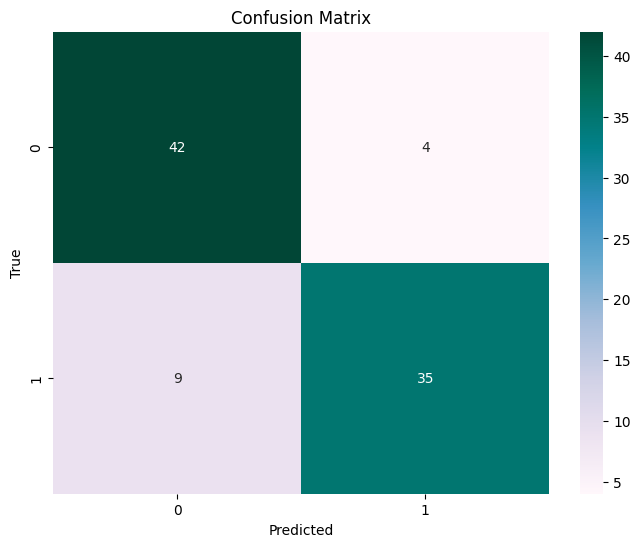

In [68]:
model = LogisticRegression(solver='liblinear')

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Support Vector Classifier

Accuracy: 0.79
ROC AUC Score: 0.79
G-Mean: 0.62
F1 Score: 0.78
Sensitivity: 0.75
Specificity: 0.83
Precision: 0.8
AVG: 0.73


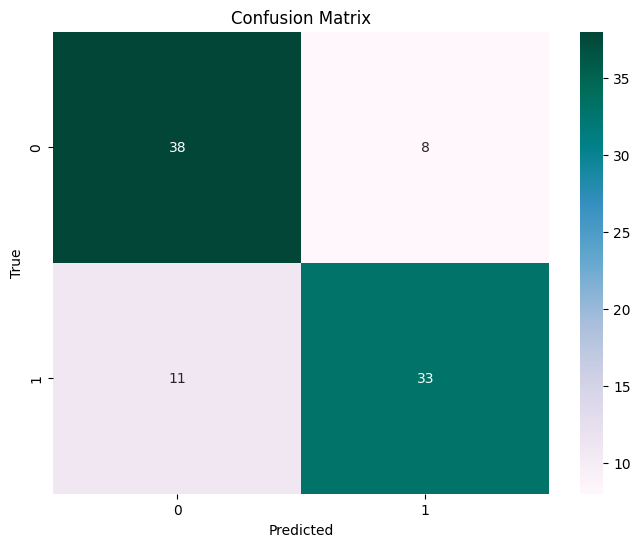

In [69]:
model = SVC()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Decision Tree Classifier

Accuracy: 0.72
ROC AUC Score: 0.72
G-Mean: 0.51
F1 Score: 0.69
Sensitivity: 0.64
Specificity: 0.8
Precision: 0.76
AVG: 0.64


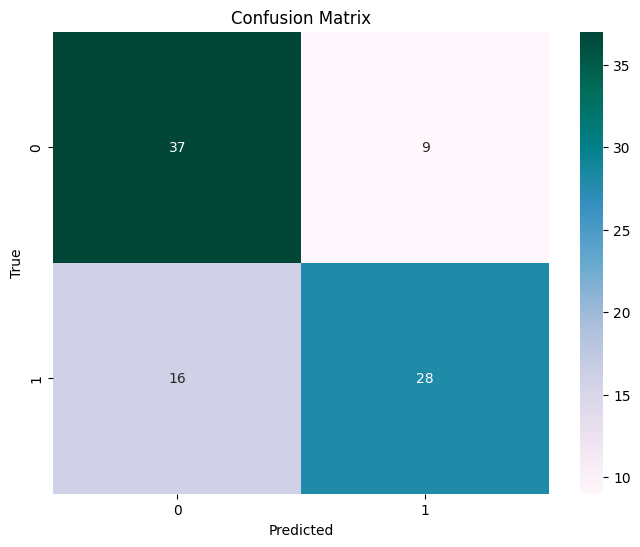

In [70]:
model = DecisionTreeClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Random Forest Classification

Accuracy: 0.8
ROC AUC Score: 0.8
G-Mean: 0.64
F1 Score: 0.79
Sensitivity: 0.77
Specificity: 0.83
Precision: 0.81
AVG: 0.74


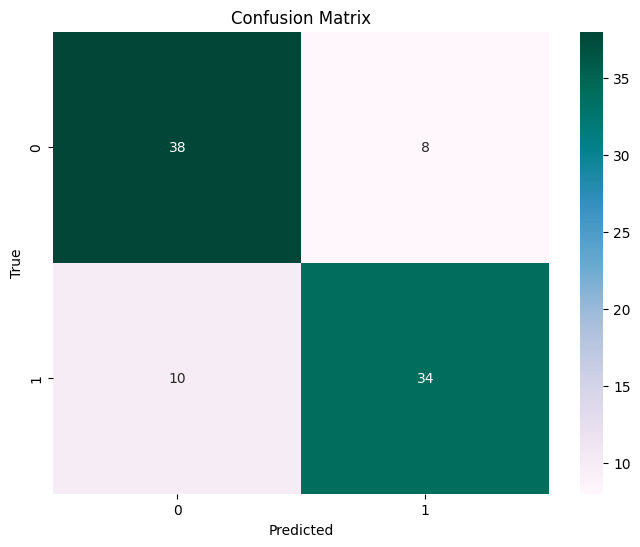

In [71]:
model = RandomForestClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Ada Boost Classifier

Accuracy: 0.79
ROC AUC Score: 0.79
G-Mean: 0.62
F1 Score: 0.78
Sensitivity: 0.75
Specificity: 0.83
Precision: 0.8
AVG: 0.73


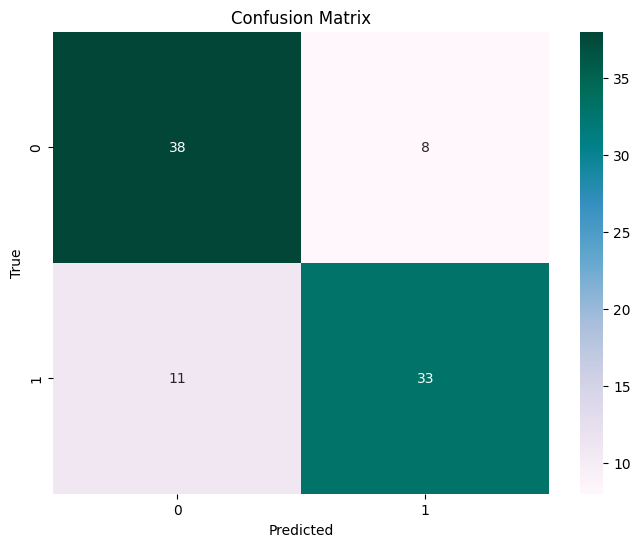

In [72]:
model = AdaBoostClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### XGBoost

Accuracy: 0.76
ROC AUC Score: 0.75
G-Mean: 0.57
F1 Score: 0.74
Sensitivity: 0.73
Specificity: 0.78
Precision: 0.76
AVG: 0.69


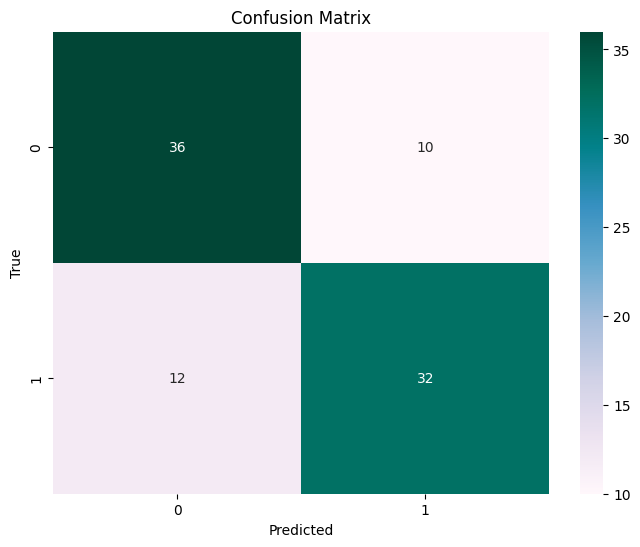

In [73]:
model = xgb.XGBClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Neural Network Classification

d:\github\venv\heart disease risk prediction\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.77
ROC AUC Score: 0.77
G-Mean: 0.59
F1 Score: 0.76
Sensitivity: 0.75
Specificity: 0.78
Precision: 0.77
AVG: 0.7


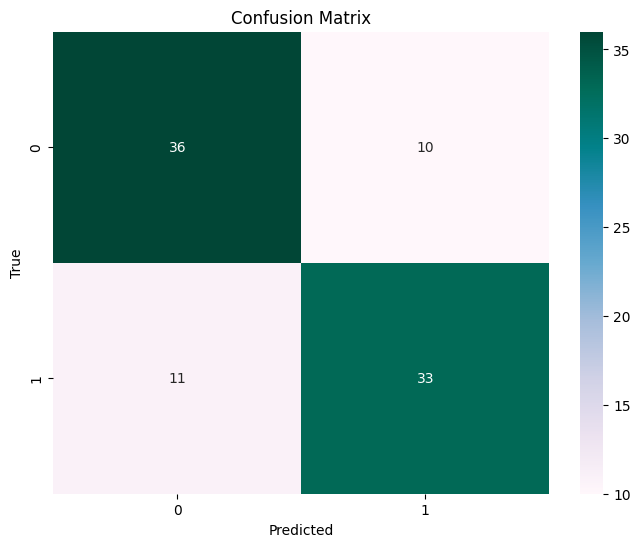

In [74]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam')

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)